In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, measure, feature
import pandas as pd

In [51]:
MASK = io.imread('features/1c_mask.tif')
STACK = io.imread('../4 Raw data/good stacks/160719_06 stack_16-03-20/1c.tif')

In [48]:
indcs = [10,17,19,29]

img = io.imread('features/Trainable Weka Segmentation v3.3.1.tif')

def read_mask(fname):
    mask = io.imread(f'features/{fname}.tif')
    mask += 1
    mask[mask != 1] = 0
    return mask


TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


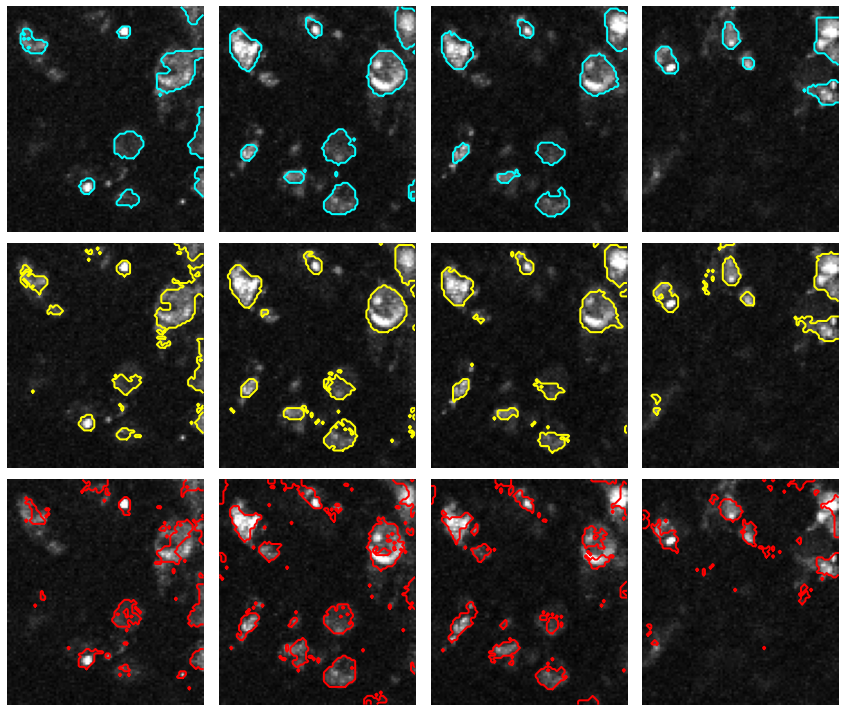

In [49]:

GT = io.imread('features/GroundTruth.tif')
masks = []
fnames = [
    # 'GroundTruth',
    '3first',
    'MeanVariance',
    'Derivatives',
]
colors = [
    'cyan',
    'yellow',
    'red',
]

def overlay_mask(ax, stack, z, mask, color):
    # fig = plt.figure(figsize=(8,8))
    contours = measure.find_contours(mask[z], 0.5)
    ax.imshow(stack[z], cmap='gray')
    for contour in contours:
        line = ax.plot(contour[:,1], contour[:,0], color=color, lw=2)
    line[0].set_label(z * 0.7736944)
    ax.axis('off')
    # plt.legend()
    # fig.savefig(f'temp/{z*0.7736944:.1f}.png')
    # plt.show()
    return ax

fig, axes = plt.subplots(3, 4, figsize=(12,10))
for i, rowax in enumerate(axes):
    for j, colax in enumerate(rowax):
        mask = read_mask(fnames[i])
        ax = overlay_mask(colax, img, indcs[j], mask, colors[i])
        if j == 0: ax.set_ylabel(fnames[i])

plt.tight_layout()
fig.savefig(f'Features: {fnames}.pdf')
plt.show()

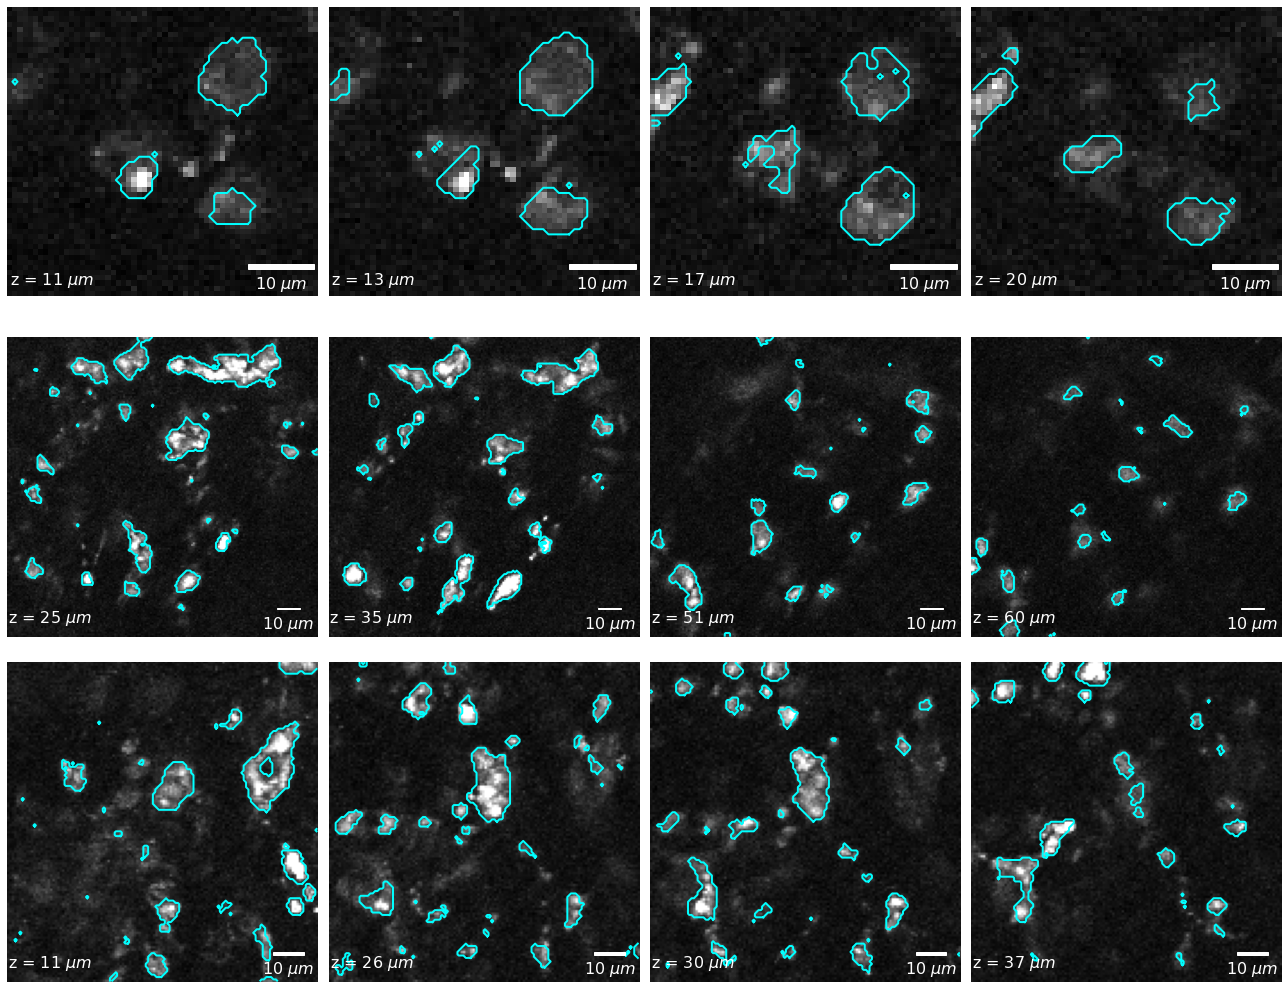

In [105]:
from dataclasses import dataclass
from matplotlib import font_manager as fm
fontprops = fm.FontProperties(size=16)

@dataclass
class Subset:
    x1:int
    y1:int
    x2:int
    y2:int
    z:int

    def extract(self, stack):
        return stack[self.z, self.y1:self.y2, self.x1:self.x2]

S1 = [
        Subset(39, 40, 169, 174, 11),
        Subset(39, 40, 169, 174, 26),
        Subset(39, 40, 169, 174, 30),
        Subset(39, 40, 169, 174, 37),
        ]

S2 = [
        Subset(226, 248, 400, 416, 25),
        Subset(226, 248, 400, 416, 35),
        Subset(226, 248, 400, 416, 51),
        Subset(226, 248, 400, 416, 60),
        ]
        
S3 = [
        Subset(23, 244, 83, 300, 11),
        Subset(23, 244, 83, 300, 13),
        Subset(23, 244, 83, 300, 17),
        Subset(23, 244, 83, 300, 20),
        ]
scale = 1.2925
size = 10
fig_scale = 1.5
fig, axes = plt.subplots(3, 4, figsize=(12*fig_scale,9.5*fig_scale))
S = [S3, S2, S1]
for j, S in enumerate(S):
        for i in range(len(S)):
                stack = S[i].extract(STACK)
                mask = S[i].extract(MASK)
                stack_height = stack.shape[0]

                axes[j, i].imshow(stack, cmap='gray')
                contours = measure.find_contours(mask, 0.5)
                axes[j, i].imshow(stack, cmap='gray')
                for contour in contours:
                        line = axes[j, i].plot(contour[:,1], contour[:,0], color='cyan', lw=2)
                scalebar = AnchoredSizeBar(axes[j, i].transData,
                                        size*scale,
                                        f'{size} $\mu m$',
                                        loc=4, sep=5,
                                        color='white',
                                        frameon=False, 
                                        label_top = False,
                                        size_vertical=1,
                                        fontproperties=fontprops)
                depth = f'z = {S[i].z:.0f} $\mu m$'
                axes[j,i].text(0, stack_height*0.95, depth, color='white', fontsize=16)
                # axes[j, i].set_title(depth)
                axes[j, i].add_artist(scalebar)
                axes[j, i].axis('off')

plt.tight_layout()
fig.savefig(f'Another example of segmentation.pdf')
plt.show()
